#Double 7's (Short Term Trading Strategies that Work)

    1. The SPY is above its 200-day moving average
    2. The SPY closes at a 7-day low, buy.
    3. If the SPY closes at a 7-day high, sell your long position.
    
    (optimize for number of days)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [4]:
#symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [5]:
periods = range(2, 16)
periods = [str(period) for period in periods]

Run Strategy

In [6]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

2 3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,2,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,2.05,3.17,3.49,2.04,1.89,6.72,6.56,2.90,-0.80,-1.74,-1.35,-1.38,-3.09,-0.67
max_closed_out_drawdown,-34.40,-33.80,-25.28,-24.61,-22.80,-20.10,-28.35,-45.01,-50.21,-48.06,-48.23,-46.36,-60.35,-58.86
drawdown_annualized_return,-16.77,-10.66,-7.25,-12.05,-12.04,-2.99,-4.32,-15.53,62.85,27.61,35.72,33.52,19.51,88.14
drawdown_recovery,-1.13,-0.65,-1.33,-0.90,-3.44,-0.18,-3.78,-3.85,-3.54,-3.52,-3.52,-3.52,-3.52,-3.52
best_month,22.44,22.16,22.57,16.14,15.37,16.15,16.17,19.58,19.57,20.52,18.61,16.86,22.36,22.30
worst_month,-13.74,-14.18,-17.68,-17.71,-17.68,-17.70,-17.71,-24.36,-24.37,-24.36,-24.36,-24.37,-24.38,-24.34
sharpe_ratio,0.20,0.26,0.28,0.20,0.19,0.47,0.45,0.25,0.05,0.00,0.02,0.02,-0.07,0.06
sortino_ratio,0.15,0.21,0.22,0.15,0.14,0.34,0.33,0.18,0.04,0.00,0.02,0.01,-0.06,0.05
monthly_std,4.65,4.27,4.28,3.91,3.72,3.54,3.76,4.14,4.39,4.16,4.08,3.96,4.31,4.42
pct_time_in_market,33.14,28.83,27.59,25.19,23.59,23.37,23.15,24.92,26.12,25.32,25.46,23.72,27.10,27.37


Bar graphs

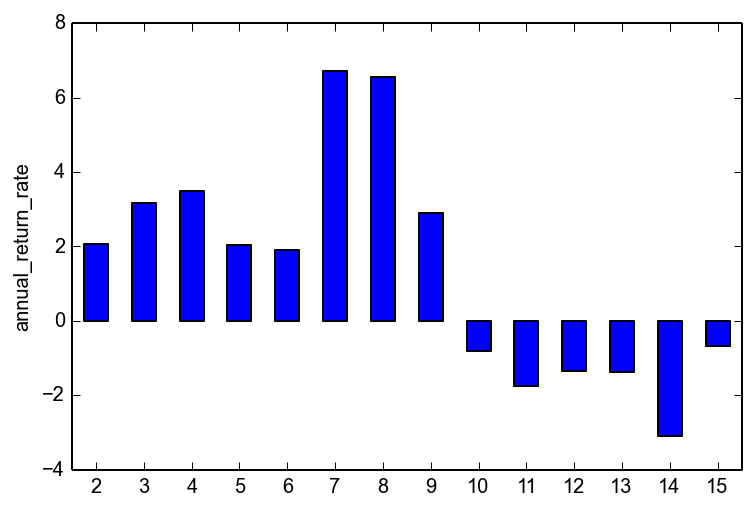

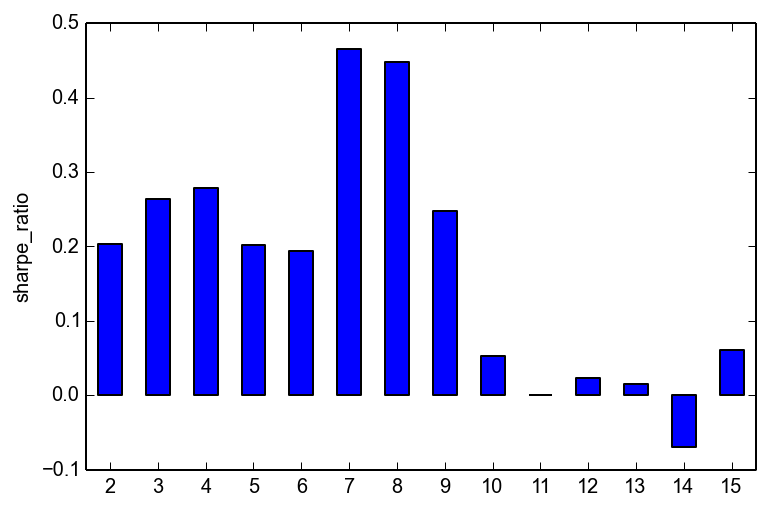

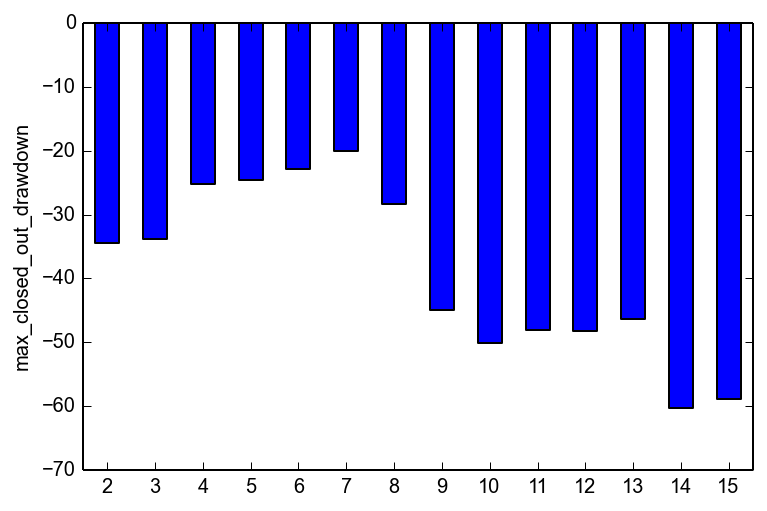

In [8]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

2007-03-08 00:00:00 BUY  277 GDX @ 35.99
2016-02-12 00:00:00 SELL 277.0 GDX @ 18.84


Equity curve

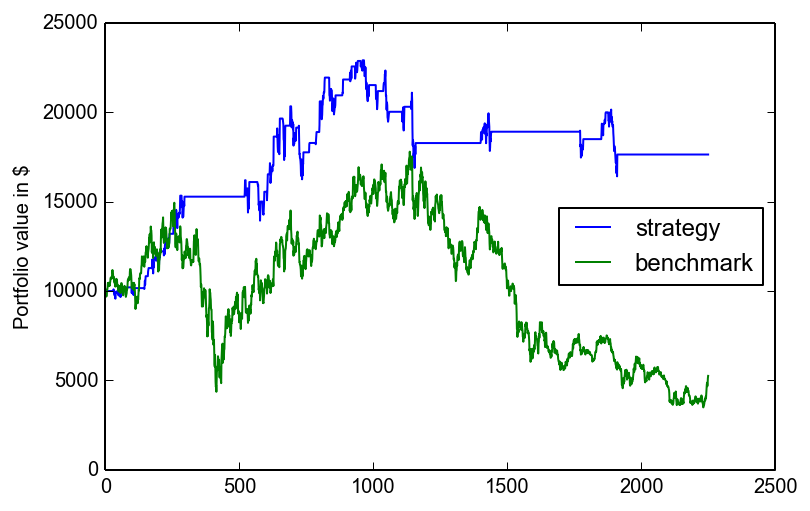

In [10]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)